In [1]:
import pandas as pd
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
# Generate a dataset with 3 features each with N = O(1000) entries
# Generate the 3 variables  x1,x2,x3 as described above

N = 1000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})
df

,x1,x2,x3
0,-0.812844,-6.148039,-7.773728
1,1.038829,0.061597,2.139255
2,-0.744679,-5.447345,-6.936702
3,0.948986,1.611725,3.509696
4,0.454910,-0.609026,0.300793
...,...,...,...
995,0.501364,2.806220,3.808949
996,-1.115753,-9.211868,-11.443373
997,0.835443,1.890585,3.561471
998,1.157098,6.130355,8.444551


In [3]:
#standardization
x1 = []
for i in df['x1']:
    i = (i-df['x1'].mean())/df['x1'].std()
    x1.append(i)

x2 = []
for i in df['x2']:
    i = (i-df['x2'].mean())/df['x2'].std() 
    x2.append(i)

x3 = []    
for i in df['x3']:
    i = (i-df['x3'].mean())/df['x3'].std()
    x3.append(i)

df['x1'] = x1
df['x2'] = x2
df['x3'] = x3
df

,x1,x2,x3
0,-0.819220,-2.019919,-1.888123
1,0.976048,-0.003277,0.478220
2,-0.753131,-1.792362,-1.688315
3,0.888942,0.500142,0.805360
4,0.409916,-0.221069,0.039358
...,...,...,...
995,0.454956,0.888067,0.876795
996,-1.112901,-3.014928,-2.764109
997,0.778858,0.590705,0.817719
998,1.090715,1.967613,1.983366


In [4]:
# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

cov = np.cov(df.T)
eigenvalues, eigenvectors = la.eig(cov)
print('the eigenvalues of the cov matrix are:\n',np.real_if_close(eigenvalues),'\n')
print('the eigenvectors of the cov matrix are:\n',eigenvectors,'\n')


the eigenvalues of the cov matrix are:
 [ 2.29232826e+00  7.07671737e-01 -2.54143975e-16] 

the eigenvectors of the cov matrix are:
 [[-0.49519176 -0.78662022 -0.36880043]
 [-0.56552065  0.61410679 -0.55050817]
 [-0.6595237   0.06404285  0.7489506 ]] 



In [5]:
# Find the eigenvectors and eigenvalues using SVD. 
# Check that the two procedures yield to same result

U, spectrum, Vt = la.svd(df.T)                              

print('spectrum = ', spectrum, '\n Vt = ', Vt, '\n')   
print('U = \n',U, '\n')                                     #The columns of U are eigenvectors of X*X.T(= df.T*df)

values, vectors = la.eig(np.dot(df.T,df))           
print('eigenvectors of (df.T,df): \n',vectors,'\n')         # these eigenvectors are the same obtained with the
print('eigenvectors of the cov matrix are:\n',eigenvectors) # eigendecomposition of cov, computed above


spectrum =  [4.78543199e+01 2.65887959e+01 5.09335144e-15] 
 Vt =  [[ 5.83696238e-02 -1.66520994e-02  5.22428384e-02 ... -2.63099473e-02
  -6.18735228e-02  1.76021012e-02]
 [ 2.69644397e-02  2.77998875e-02  2.31826231e-02 ...  7.42945560e-03
  -1.79536782e-02  3.10925935e-03]
 [-1.03439792e-01  8.43783353e-01  2.60627699e-02 ... -2.69978991e-03
   5.06551744e-03  6.09637513e-04]
 ...
 [ 2.58247112e-02  6.58877420e-03  4.44864177e-03 ...  9.99291831e-01
  -1.40545461e-03  4.09663903e-04]
 [ 4.25051609e-02  1.14415381e-02  4.67764132e-02 ... -1.30711532e-03
   9.95899509e-01  1.04595277e-03]
 [-1.30159810e-02 -4.72377813e-03 -9.91137853e-03 ...  3.97480743e-04
   1.11959950e-03  9.99704899e-01]] 

U = 
 [[-0.49519176  0.78662022 -0.36880043]
 [-0.56552065 -0.61410679 -0.55050817]
 [-0.6595237  -0.06404285  0.7489506 ]] 

eigenvectors of (df.T,df): 
 [[-0.49519176 -0.78662022 -0.36880043]
 [-0.56552065  0.61410679 -0.55050817]
 [-0.6595237   0.06404285  0.7489506 ]] 

eigenvectors of the 

In [6]:
# What percent of the total dataset's variability is explained by the principal components? 
# Given how the dataset was constructed, do these make sense? 
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

eigenvalues, eigenvectors = la.eig(cov)

Lambda = np.real_if_close(np.diag(eigenvalues))
print('Lambda = \n',Lambda, '\n')
print("Lambda.trace():", Lambda.trace(), '\n')

var_PC1 = Lambda[0,0]/Lambda.trace()
var_PC2 = Lambda[1,1]/Lambda.trace()
var_PC3 = Lambda[2,2]/Lambda.trace()
print('% of d.f. variability with princ.comp. 1:',(var_PC1)*100)  
print('% of d.f. variability with princ.comp. 2:',(var_PC2)*100)  
print('% of d.f. variability with princ.comp. 3:',(var_PC3)*100,'\n')  

print('the PC with the highest % of variability is x1')
print('considering x1 and x2 the total variability is over 99%')


Lambda = 
 [[ 2.29232826e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.07671737e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.54143975e-16]] 

Lambda.trace(): 2.9999999999999982 

% of d.f. variability with princ.comp. 1: 76.4109420879225
% of d.f. variability with princ.comp. 2: 23.589057912077507
% of d.f. variability with princ.comp. 3: -8.471465831704434e-15 

the PC with the highest % of variability is x1
considering x1 and x2 the total variability is over 99%


C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


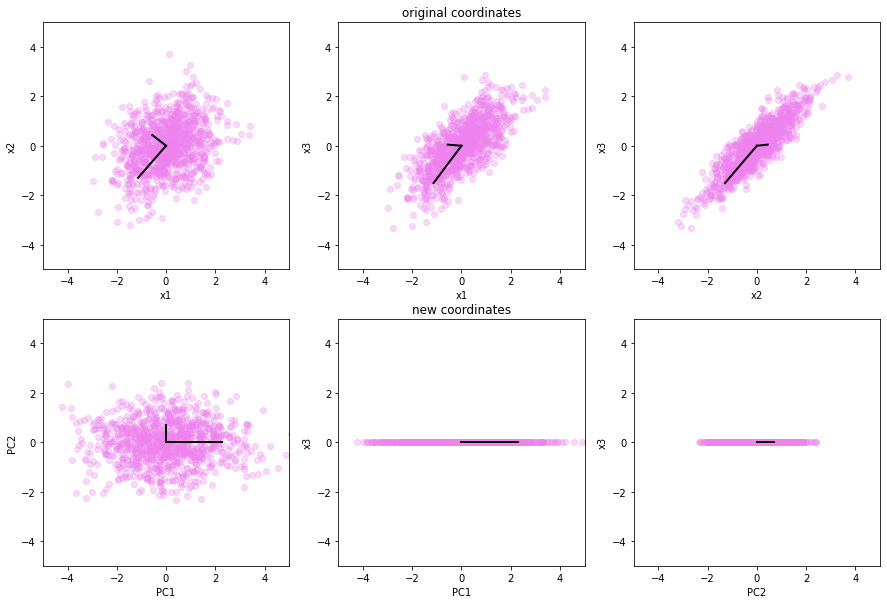

In [7]:
# Redefine the data in the basis yielded by the PCA procedure

#original coord
DF = pd.DataFrame(df.T)

#the features of the dataset have all zero mean
l0, V0 = la.eig(np.dot(DF, DF.T)/(N-1))

# Plot the data points in the original and the new coordiantes as a set of scatter plots. 
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

DF_rot = np.dot(V0.T, DF)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#plots in the original coordinates
ax1.scatter(df['x1'], df['x2'], alpha=0.3, color='violet')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.axis([-5,5,-5,5])

ax2.scatter(df['x1'], df['x3'], alpha=0.3, color='violet')
ax2.set_xlabel('x1')
ax2.set_ylabel('x3')
ax2.axis([-5,5,-5,5])
ax2.set_title('original coordinates')

ax3.scatter(df['x2'], df['x3'], alpha=0.3, color='violet')
ax3.set_xlabel('x2')
ax3.set_ylabel('x3')
ax3.axis([-5,5,-5,5])

#eigenvectors
for li, vi in zip(eigenvalues, eigenvectors.T):
    ax1.plot([0, li*vi[0]], [0, li*vi[1]], 'k-', lw=2)
    ax2.plot([0, li*vi[0]], [0, li*vi[2]], 'k-', lw=2)
    ax3.plot([0, li*vi[1]], [0, li*vi[2]], 'k-', lw=2)

#plots in the new coordinates
ax4.scatter(DF_rot[0,:], DF_rot[1,:], alpha=0.3, color='violet')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC2')
ax4.axis([-5,5,-5,5])

ax5.scatter(DF_rot[0,:], DF_rot[2,:], alpha=0.3, color='violet')
ax5.set_xlabel('PC1')
ax5.set_ylabel('x3')
ax5.axis([-5,5,-5,5])
ax5.set_title('new coordinates')

ax6.scatter(DF_rot[1,:], DF_rot[2,:], alpha=0.3, color='violet')
ax6.set_xlabel('PC2')
ax6.set_ylabel('x3')
ax6.axis([-5,5,-5,5]) 

#eigenvectors
for li, vi in zip(l0, np.diag([1]*3)):
    ax4.plot([0, li*vi[0]], [0, li*vi[1]], 'k-', lw=2)
    ax5.plot([0, li*vi[0]], [0, li*vi[2]], 'k-', lw=2)
    ax6.plot([0, li*vi[1]], [0, li*vi[2]], 'k-', lw=2)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [8]:
#dataset generated in the previous exercise
N = 1000
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

data = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})
data

,x1,x2,x3
0,0.017118,0.859533,0.893770
1,0.902942,3.666630,5.472514
2,0.464575,2.390272,3.319421
3,2.071165,2.321008,6.463337
4,-0.892179,1.689620,-0.094738
...,...,...,...
995,0.419968,6.451661,7.291598
996,-0.965203,-4.016471,-5.946877
997,0.500186,-6.044665,-5.044293
998,-0.312841,1.311515,0.685833


In [9]:
#Add uncorrelated random noise: it should be represented by other 10 uncorrelated variables normal distributed,
#with standard deviation much smaller (say, a factor 50) than those used to generate the  𝑥1  and  𝑥2 .

std = 1/50
for i in range(4,14):
    mean = i-0.5
    data['x',i] =np.random.normal(mean,std,N)
data

,x1,x2,x3,"(x, 4)","(x, 5)","(x, 6)","(x, 7)","(x, 8)","(x, 9)","(x, 10)","(x, 11)","(x, 12)","(x, 13)"
0,0.017118,0.859533,0.893770,3.494565,4.486730,5.491109,6.546673,7.529796,8.508484,9.496625,10.484085,11.495161,12.496012
1,0.902942,3.666630,5.472514,3.503548,4.514812,5.493973,6.485860,7.486433,8.510303,9.502285,10.492475,11.492344,12.488070
2,0.464575,2.390272,3.319421,3.486568,4.516776,5.522124,6.512840,7.542714,8.492518,9.488538,10.490462,11.487387,12.507209
3,2.071165,2.321008,6.463337,3.477136,4.511820,5.511834,6.500749,7.514403,8.473132,9.529792,10.461992,11.510552,12.495687
4,-0.892179,1.689620,-0.094738,3.505055,4.521807,5.515181,6.514980,7.491779,8.509977,9.458707,10.495273,11.486853,12.503207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.419968,6.451661,7.291598,3.516199,4.480987,5.518759,6.496641,7.529014,8.518387,9.530754,10.536495,11.467952,12.486123
996,-0.965203,-4.016471,-5.946877,3.473196,4.520436,5.493844,6.561508,7.504858,8.454031,9.471184,10.482537,11.503707,12.509738
997,0.500186,-6.044665,-5.044293,3.487527,4.511501,5.473930,6.543496,7.522696,8.508273,9.500704,10.502541,11.548034,12.484750
998,-0.312841,1.311515,0.685833,3.495981,4.504370,5.506554,6.486021,7.482862,8.511726,9.512672,10.526216,11.508427,12.518327


In [10]:
#compute eigenvalues and eigenvectors of the cov matrix
eigval, eigvec = la.eig(np.cov(data.T))

print('eigenvalues = \n', np.real_if_close(eigval) , '\n')
trace= np.real_if_close(np.sum(eigval))
print("sum = ", trace, '\n')

# % of the dataset's variability
for i in range(13):
    var_PCi = np.real_if_close(eigval)[i]/trace
    print('% of d.f. variability with princ.comp.',i+1,':',(var_PCi)*100)
    
print('the PC with the highest % of variability is x1')
print('considering x1 and x2 the total variability is over 99%')


eigenvalues = 
 [ 2.73370418e+01  2.09361102e+00 -7.37203049e-16  3.42762165e-04
  4.57284824e-04  3.61026806e-04  3.65933682e-04  3.80374243e-04
  3.86560848e-04  4.13762142e-04  4.33724902e-04  4.29575862e-04
  4.23580080e-04] 

sum =  29.434647389190438 

% of d.f. variability with princ.comp. 1 : 92.87368529158285
% of d.f. variability with princ.comp. 2 : 7.112743675948351
% of d.f. variability with princ.comp. 3 : -2.5045418048636075e-15
% of d.f. variability with princ.comp. 4 : 0.0011644853776237574
% of d.f. variability with princ.comp. 5 : 0.0015535597161105558
% of d.f. variability with princ.comp. 6 : 0.0012265368797268745
% of d.f. variability with princ.comp. 7 : 0.001243207290784775
% of d.f. variability with princ.comp. 8 : 0.0012922670282483036
% of d.f. variability with princ.comp. 9 : 0.0013132851339195434
% of d.f. variability with princ.comp. 10 : 0.0014056976348793126
% of d.f. variability with princ.comp. 11 : 0.0014735182529237102
% of d.f. variability with prin

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


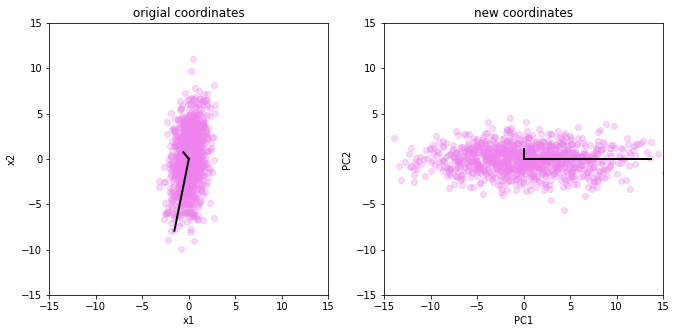

In [11]:
data_rot = np.dot(eigvec.T, data.T)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

factor = 0.5

#plots in the original coordinates
ax1.scatter(data['x1'], data['x2'], alpha=0.3, color='violet')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('origial coordinates')
ax1.axis([-15,15,-15,15]) 
for li, vi in zip(eigval, eigvec.T):
    ax1.plot([0, factor*li*vi[0]], [0, factor*li*vi[1]], 'k-', lw=2)

#plots in the new coordinates
ax2.scatter(data_rot[0,:], data_rot[1,:], alpha=0.3, color='violet')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('new coordinates')
ax2.axis([-15,15,-15,15]) 
for li, vi in zip(eigval, np.diag([1]*2)):
    ax2.plot([0, factor*li*vi[0]], [0, factor*li*vi[1]], 'k-', lw=2)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [12]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 